In [2]:
import numpy as np
import random

# Define the grid-world environment as a 3x3 matrix
# 'S' denotes the starting state
# 'G' denotes the goal (terminal) state with a reward of 10
# 'X' denotes an obstacle with a reward of -5
grid_world = np.array([
    ['S', '0', '0'],
    ['0', 'X', '0'],
    ['0', '0', 'G']
])

# Define the Q-learning parameters
num_actions = 4  # Up, Down, Left, Right
num_states = grid_world.size
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 1000
max_steps_per_episode = 100
exploration_prob = 0.3  # Epsilon-greedy policy: 0.3 probability of exploration

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Convert grid-world positions to state indices
def state_to_index(state):
    return np.ravel_multi_index(state, dims=grid_world.shape)

# Q-learning algorithm
for episode in range(num_episodes):
    state = (0, 0)  # Start at the top-left corner (the starting state)
    state_index = state_to_index(state)
    done = False

    for step in range(max_steps_per_episode):
        # Epsilon-greedy policy for action selection
        if random.uniform(0, 1) < exploration_prob:
            action = random.randint(0, num_actions - 1)  # Exploration
        else:
            action = np.argmax(q_table[state_index, :])  # Exploitation

        # Take the action and observe the next state and reward
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(grid_world.shape[0] - 1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        else:  # Right
            next_state = (state[0], min(grid_world.shape[1] - 1, state[1] + 1))

        next_state_index = state_to_index(next_state)

        # Define rewards based on the grid-world environment
        if grid_world[next_state] == 'G':
            reward = 10
            done = True  # Episode terminates when reaching the goal
        elif grid_world[next_state] == 'X':
            reward = -5
            done = True  # Episode terminates when hitting an obstacle
        else:
            reward = 0

        # Q-value update using the Bellman equation
        q_table[state_index, action] = (1 - learning_rate) * q_table[state_index, action] + \
                                      learning_rate * (reward + discount_factor * np.max(q_table[next_state_index, :]))

        state = next_state
        state_index = next_state_index

        if done:
            break

# Let's see the learned Q-table
print("Learned Q-table:")
print(q_table)


Learned Q-table:
[[ 6.56036701  5.9023163   6.56072183  7.29      ]
 [ 7.28959382 -4.99999305  6.55551366  8.1       ]
 [ 8.09876089  9.          7.28908112  8.09627994]
 [ 6.56058959  0.35262341  2.7526826  -4.24952682]
 [ 0.          0.          0.          0.        ]
 [ 8.09769356 10.         -4.99410491  8.99125599]
 [ 2.02311726  0.          0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [34]:
import numpy as np
import random


reward_grid = np.zeros((10,10))

# Define the Q-learning parameters
num_actions = 4  # Up, Down, Left, Right
num_states = reward_grid.size
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 1000
max_steps_per_episode = 1000
exploration_prob = 0.3  # Epsilon-greedy policy: 0.3 probability of exploration
minstep = 1000

# Initialize the Q-table
q_table = np.zeros((num_states, num_actions))

# Convert grid-world positions to state indices
def state_to_index(state):
    return np.ravel_multi_index(state, dims=grid_world.shape)


def valid_actions(index,action):
    if action == 0:
        if index[0] == 0:
            return False
        else:
            return True
    elif action == 1:
        if index[0] == 9:
            return False
        else:
            return True
    elif action == 2:
        if index[1] == 0:
            return False
        else:
            return True
    elif action == 3:
        if index[1] == 9:
            return False
        else:
            return True


# Q-learning algorithm
for episode in range(num_episodes):
    state = (0, 0)  # Start at the top-left corner (the starting state)
    grid_world = np.zeros(reward_grid.shape)
    grid_world[state] = 1
    state_index = state_to_index(state)
    done = False
    action_list = []
    for step in range(max_steps_per_episode):
        # Epsilon-greedy policy for action selection
        if random.uniform(0, 1) < exploration_prob:
            action = random.randint(0, num_actions - 1)  # Exploration
        else:
            action = np.argmax(q_table[state_index, :])  # Exploitation
        action_list.append(action)
        if not valid_actions(state,action):
                reward = -1
        # Take the action and observe the next state and reward
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(grid_world.shape[0] - 1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        else:  # Right
            next_state = (state[0], min(grid_world.shape[1] - 1, state[1] + 1))

        next_state_index = state_to_index(next_state)

        # Define rewards based on the grid-world environment
        if grid_world[next_state] == 0:
            reward = 1
            grid_world[next_state] = 1
        elif grid_world[next_state] == 1:
            reward =  - 1
            


        if grid_world.all() == 1:
            reward += 1000
            if step < 100:
                reward += 1000
            if step < minstep:
                minstep = step
                action_list_min = action_list
            done = True

        # Q-value update using the Bellman equation
        q_table[state_index, action] = (1 - learning_rate) * q_table[state_index, action] + \
                                      learning_rate * (reward + discount_factor * np.max(q_table[next_state_index, :]))

        state = next_state
        state_index = next_state_index

        if done:
            break

# Let's see the learned Q-table
print("Learned Q-table:")
print(q_table)

Learned Q-table:
[[-7.50929079 -7.49251443 -7.51855734 -7.35936254]
 [-7.50165735 -7.52832401 -7.50408279 -7.40917331]
 [-7.52190605 -7.53347346 -7.49215804 -7.36257012]
 [-7.51098399 -7.51062212 -7.45910204 -7.32761524]
 [-7.55188285 -7.49393492 -7.48395608 -7.29319942]
 [-7.61905481 -7.31816336 -7.51070413 -7.21871997]
 [-7.51967279 -7.27297657 -7.52541663 -7.4824177 ]
 [-7.42291471 -7.42944232 -7.37510252 -7.01815522]
 [-7.37091315 -7.25824988 -7.41786013 -6.98392107]
 [-7.42278636 -7.00431737 -7.36425247 -7.39036975]
 [-7.56506096 -7.58999126 -7.66360655 -7.56024587]
 [-7.56148931 -7.55830365 -7.54875374 -7.51194906]
 [-7.5323289  -7.49428488 -7.56023627 -7.5508069 ]
 [-7.53888889 -7.62374956 -7.53582397 -7.45716593]
 [-7.57695078 -7.6034445  -7.63148532 -7.51763529]
 [-7.50890145 -7.49105379 -7.52933886 -7.36737842]
 [-7.44852126 -7.20764776 -7.44717584 -7.20550465]
 [-7.09353221 -7.3344764  -7.38338214 -7.1112536 ]
 [-7.35558174 -7.17659696 -7.37244103 -7.35957925]
 [-7.36142557 

In [35]:
a = np.zeros((10,10))
grid = np.zeros((10,10))
init = (0,0)
a[init] = 1
step = 1
while step < 100:
    action = np.argmax(q_table[init[0]*3 + init[1]])
    print(init, action)
    if action == 0:
        print('up')
        init = (init[0]-1,init[1])
    elif action == 1:
        print('down')
        init = (init[0]+1,init[1])
    elif action == 2:
        print('left')
        init = (init[0],init[1]-1)
    elif action == 3:
        print('right')
        init = (init[0],init[1]+1)
    a[init] = 1
    grid[init] = step
    step += 1


(0, 0) 3
right
(0, 1) 3
right
(0, 2) 3
right
(0, 3) 3
right
(0, 4) 3
right
(0, 5) 3
right
(0, 6) 1
down
(1, 6) 1
down
(2, 6) 1
down
(3, 6) 3
right
(3, 7) 3
right
(3, 8) 0
up
(2, 8) 3
right
(2, 9) 3
right


IndexError: index 10 is out of bounds for axis 1 with size 10

In [29]:
grid

array([[ 0.,  1.,  2.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0., 98., 99.,  0.]])

In [12]:
import matplotlib.pyplot as plt

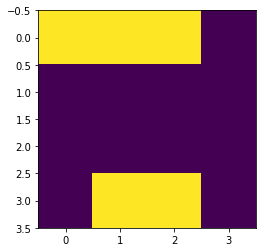

In [30]:
plt.imshow(a)